# Train a Semantic Segmentation Model for Water Detection

[![image](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/opengeos/geoai/blob/main/docs/examples/water_detection.ipynb)

This notebook demonstrates how to train semantic segmentation models for water detection.

## Install packages

To use the new functionality, ensure the required packages are installed.

In [1]:
%pip install geoai-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.9/632.9 kB 36.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.5/122.5 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 119.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 125.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 605.0/605.0 kB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Import libraries

In [2]:
import geoai

## Download sample data

We'll use the [waterbody dataset](https://www.kaggle.com/datasets/franciscoescobar/satellite-images-of-water-bodies) from Kaggle. You will need to create an account and download the dataset. I have already downloaded the dataset and saved a copy on Hugging Face. Let's download the dataset:

In [3]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/waterbody-dataset.zip"

In [4]:
out_folder = geoai.download_file(url)

Extracted to: waterbody-dataset


## Train semantic segmentation model

Now we'll train a semantic segmentation model using the new `train_segmentation_model` function. This function supports various architectures from `segmentation-models-pytorch`:

- **Architectures**: `unet`, `unetplusplus` `deeplabv3`, `deeplabv3plus`, `fpn`, `pspnet`, `linknet`, `manet`
- **Encoders**: `resnet34`, `resnet50`, `efficientnet-b0`, `mobilenet_v2`, etc.

For more details, please refer to the [segmentation-models-pytorch documentation](https://smp.readthedocs.io/en/latest/models.html).

Let's train the module using U-Net with ResNet34 encoder:

In [5]:
# Test train_segmentation_model with automatic size detection
geoai.train_segmentation_model(
    images_dir=f"{out_folder}/images",
    labels_dir=f"{out_folder}/masks",
    output_dir=f"{out_folder}/unet_models",
    architecture="unet",
    encoder_name="resnet34",
    encoder_weights="imagenet",
    num_channels=3,
    num_classes=2,  # background and water
    batch_size=8,
    num_epochs=3,
    learning_rate=0.001,
    val_split=0.2,
    verbose=True,
)

Using device: cuda
Found 2841 image files and 2841 label files
Training on 2272 images, validating on 569 images
Checking image sizes for compatibility...
Setting target_size to (512, 512) to standardize image dimensions.
This will resize all images to 512x512 pixels.
To use a different size, set target_size parameter explicitly.
Testing data loader...
Data loader test passed.


config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

Starting training with unet + resnet34
Model parameters: 24,436,514
Epoch: 1, Batch: 1/284, Loss: 0.7145, Time: 5.57s
Epoch: 1, Batch: 11/284, Loss: 0.4557, Time: 5.83s
Epoch: 1, Batch: 21/284, Loss: 0.6258, Time: 5.85s
Epoch: 1, Batch: 31/284, Loss: 0.4174, Time: 5.88s
Epoch: 1, Batch: 41/284, Loss: 0.4804, Time: 5.89s
Epoch: 1, Batch: 51/284, Loss: 0.7058, Time: 5.95s
Epoch: 1, Batch: 61/284, Loss: 0.5426, Time: 6.01s
Epoch: 1, Batch: 71/284, Loss: 0.4147, Time: 6.01s
Epoch: 1, Batch: 81/284, Loss: 0.4112, Time: 6.08s
Epoch: 1, Batch: 91/284, Loss: 0.5092, Time: 6.08s
Epoch: 1, Batch: 101/284, Loss: 0.4195, Time: 6.16s
Epoch: 1, Batch: 111/284, Loss: 0.4914, Time: 6.21s
Epoch: 1, Batch: 121/284, Loss: 0.4825, Time: 6.25s
Epoch: 1, Batch: 131/284, Loss: 0.5639, Time: 6.28s
Epoch: 1, Batch: 141/284, Loss: 0.4189, Time: 6.34s
Epoch: 1, Batch: 151/284, Loss: 0.4681, Time: 6.36s
Epoch: 1, Batch: 161/284, Loss: 0.4603, Time: 6.33s
Epoch: 1, Batch: 171/284, Loss: 0.4763, Time: 6.27s
Epoch: 

## Evaluate the model

Let's examine the training curves and model performance:

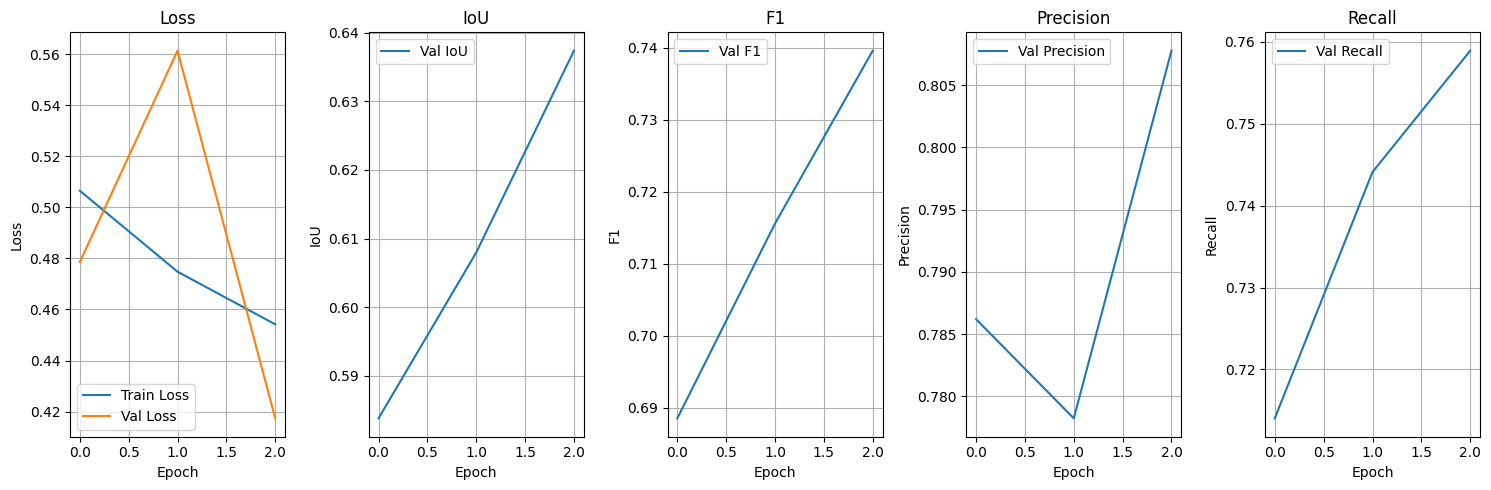


=== Performance Metrics Summary ===
IoU     - Best: 0.6374 | Final: 0.6374
F1      - Best: 0.7396 | Final: 0.7396
Precision - Best: 0.8078 | Final: 0.8078
Recall  - Best: 0.7589 | Final: 0.7589
Val Loss - Best: 0.4174 | Final: 0.4174



,epoch,train_loss,val_loss,val_iou,val_f1,val_precision,val_recall
0,1,0.506501,0.478547,0.583831,0.688522,0.786202,0.714025
1,2,0.474798,0.561305,0.607985,0.715597,0.778232,0.744116
2,3,0.454195,0.417391,0.637363,0.739618,0.807774,0.758933


In [6]:
geoai.plot_performance_metrics(
    history_path=f"{out_folder}/unet_models/training_history.pth",
    figsize=(15, 5),
    verbose=True,
)

![image](https://github.com/user-attachments/assets/381ce436-3520-4706-9def-b0a7ae8244ac)

## Run inference

You can run inference on a new image using the `semantic_segmentation` function. I don't have a new image to test on, so I'll use one of the training images. In reality, you would use your own images not used in training.

In [52]:
index = 2
test_image_path = "/content/map_capture_2025-11-17_12-08-30.jpg"
ground_truth_path = f"{out_folder}/masks/water_body_{index}.jpg"
prediction_path = f"{out_folder}/prediction/water_body_{index}.png"  # save as png to preserve exact values and avoid compression artifacts
model_path = f"{out_folder}/unet_models/best_model.pth"

In [53]:
# Run semantic segmentation inference
geoai.semantic_segmentation(
    input_path=test_image_path,
    output_path=prediction_path,
    model_path=model_path,
    architecture="unet",
    encoder_name="resnet34",
    num_channels=3,
    num_classes=2,
    window_size=512,
    overlap=256,
    batch_size=4,
)

Input file format: Regular image (.jpg)
Processing image: 1920x945
Processing 21 windows...


32it [00:00, 39.12it/s]


Raw predicted classes and counts: {0: 1496445, 1: 317955}
Binary predicted classes and counts: {0: 1496445, 255: 317955}
Inference completed in 1.03 seconds
Saved binary prediction to waterbody-dataset/prediction/water_body_2.png (PNG format to preserve exact values)


## Visualize the results

Plot saved to: waterbody-dataset/prediction/water_body_2_comparison.png


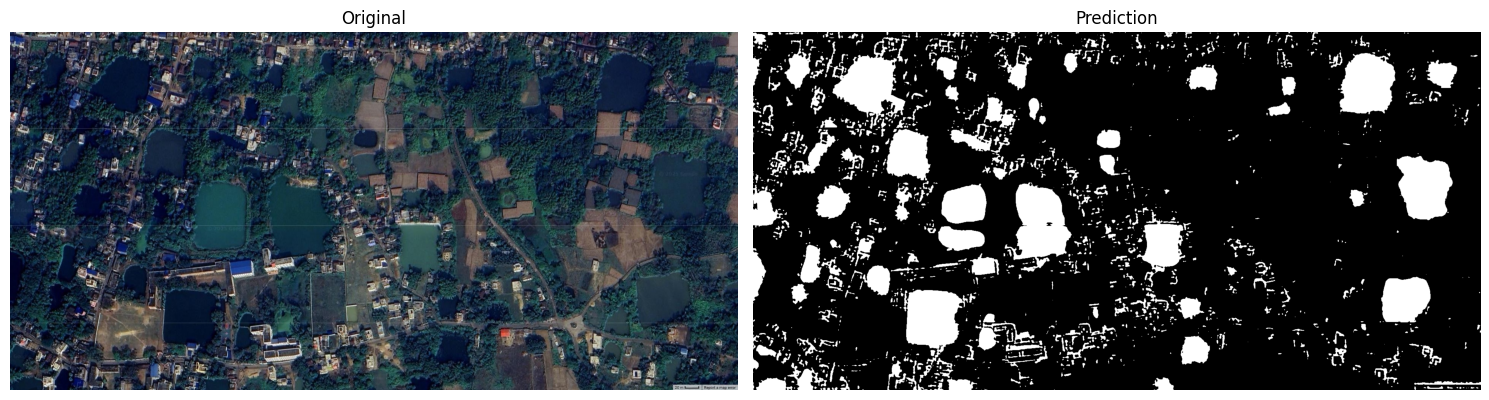

In [54]:
fig = geoai.plot_prediction_comparison(
    original_image=test_image_path,
    prediction_image=prediction_path,
    # ground_truth_image=ground_truth_path,
    titles=["Original", "Prediction"],
    figsize=(15, 5),
    save_path=f"{out_folder}/prediction/water_body_{index}_comparison.png",
    show_plot=True,
)

![image](https://github.com/user-attachments/assets/00308228-0819-4161-9a35-6a98f4cefa93)